In [2]:
from jadeR import jadeR
from jadeR_cupy import jadeR_cupy
import pandas as pd
from wfield import *
import pickle
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from NatMovie_utils import *


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import cupy as cp

In [3]:
import os
from os.path import join as pjoin
from glob import glob

path_list = glob(pjoin('/home/lzx/data/WF_VC_liuzhaoxi/','*/natural-movie*/process/*-wfield'))
path_list

['/home/lzx/data/WF_VC_liuzhaoxi/24.01.03_C83/natural-movie/process/20240103-131221-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.01.22_C83/natural-movie/process/20240122-194422-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.04.03_C92/natural-movie/process/20240403-161209-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.04.03_C92/natural-movie/process/20240403-172109-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.04.03_C92/natural-movie/process/20240403-192107-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.07_H78/natural-movie/process/20240507-113351-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.07_H78/natural-movie/process/20240507-121035-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.07_H78-DOM/natural-movie/process/20240507-182626-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.20_H78/natural-movie/process/20240520-180021-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.20_H78/natural-movie/process/20240520-185133-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.03.27_C92/natural-movie/proces

In [4]:
del path_list[2:5], path_list[-5]
path_list

['/home/lzx/data/WF_VC_liuzhaoxi/24.01.03_C83/natural-movie/process/20240103-131221-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.01.22_C83/natural-movie/process/20240122-194422-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.07_H78/natural-movie/process/20240507-113351-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.07_H78/natural-movie/process/20240507-121035-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.07_H78-DOM/natural-movie/process/20240507-182626-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.20_H78/natural-movie/process/20240520-180021-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.05.20_H78/natural-movie/process/20240520-185133-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.07.08_Q20/natural-movie/process/20240708-175712-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.07.08_Q20/natural-movie-reverse/process/20240708-210000-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.07.18_P73/natural-movie/process/20240718-170059-wfield',
 '/home/lzx/data/WF_VC_liuzhaoxi/24.07.18_P73/natural-movi

In [ ]:
# path_wfield = r'/home/lzx/data/WF_VC_liuzhaoxi/24.03.27_C92/natural-movie/process/20240327-183009-wfield'

for path_wfield in path_list:
    experiment = os.path.basename(path_wfield)[:15]
    mouse = os.path.normpath(path_wfield).split(os.sep)[5].split('_')[1]
    path_out = pjoin(path_wfield, '..', experiment + '-natural-movie1')
    os.makedirs(path_out, exist_ok=True)
    print(experiment,mouse)
    trialfile = pd.read_csv(pjoin(path_wfield, 'trials.csv'), header=None).values.astype(int)
    rawPath = pjoin(path_wfield, '../../raw')
    movie_folder = pjoin(rawPath, 'natural_movies')
    movie_list = pd.read_csv(pjoin(movie_folder, 'movie_list.txt'), header=None).values
    n_movie = movie_list.size
    movie_name_list = []
    for imovie in range(n_movie):
        movie_name_list.append(str(movie_list[imovie])[2:-6])
    n_frame = 150  # 帧

    # U = cp.load(pjoin(path_wfield, 'U.npy')).astype('float32')
    # SVTcorr = cp.load(pjoin(path_wfield, 'SVTcorr.npy')).astype('float32')
    # tif_height,tif_width=U.shape[:-1]
    frames_ave = cp.load(pjoin(path_wfield, 'frames_average.npy'))[0]

    # pre_length = 20
    # after_lenth = 30
    # # SVTcorr_sort维度：[nSVD, n_frame, n_movie, n_rep]
    # SVTcorr_sort = Gsorting_NatMov(SVTcorr, trialfile[:, 1], n_movie, n_frame, pre_length, after_lenth).astype('float32')
    # n_rep = SVTcorr_sort.shape[-1]
    # tif_sort1 = cp.tensordot(U, SVTcorr_sort, axes=(2, 0)).astype('float32')
    # tif_sort=cp.asnumpy(tif_sort1)
    # np.save(pjoin(path_out, 'tif_sort.npy'), tif_sort)
    # print('finish reconstruct tif')
    # # tif_sort维度：[width, height, n_frame, n_movie, n_rep]

    # tif = imread(pjoin(path_wfield, experiment+'-merged.tif'))
    frames_average = np.load(pjoin(path_wfield, 'frames_average.npy')).astype('float32')
    from wfield import *
    tif = mmap_dat(glob(pjoin(path_wfield, "*.bin"))[0])
    tif470 = (tif[:,0]-frames_average[0])/frames_average[0]
    tif405 = (tif[:,1]-frames_average[1])/frames_average[1]
    tif_corr=tif470-tif405
    print('finish tif_corr')
    tif_height,tif_width=tif_corr.shape[1:]

    pre_length = 20
    after_lenth = 30
    whole_length = trialfile[-1, 2]+50
    # tif_corr1=cp.asarray(tif_corr[:whole_length])
    # tif_sort2 = Gsorting_NatMov(tif_corr1.reshape(-1,tif_height*tif_width).T, trialfile[:, 1], n_movie, n_frame, pre_length, after_lenth).astype('float32')
    # tif_sort1 = tif_sort2.reshape(tif_height,tif_width,*tif_sort2.shape[1:])
    # tif_sort=cp.asnumpy(tif_sort1)
    tif_sort = sorting_NatMov(tif_corr.reshape(-1,tif_height*tif_width).T, trialfile[:, 1], n_movie, n_frame, pre_length, after_lenth).astype('float32')
    tif_sort = tif_sort.reshape(tif_height,tif_width,*tif_sort.shape[1:])
    print('finish sorting')
    # tiff_sort维度：[height, width, n_frame, n_movie, n_rep]
    n_rep = tif_sort.shape[-1]
    print('tiff_sort.shape: (height, width, n_frame, n_movie, n_rep) ', tif_sort.shape)
    np.save(pjoin(path_out, 'tif_sort.npy'), tif_sort)
    print('finish save tif_sort.npy')

    # load CCF
    lmarks = load_allen_landmarks(pjoin(path_wfield, 'dorsal_cortex_landmarks.json'))
    ccf_regions_reference, proj, brain_outline = allen_load_reference('dorsal_cortex')
    # this loads the untransformed atlas
    atlas_im, areanames, brain_mask = atlas_from_landmarks_file(pjoin(path_wfield, 'dorsal_cortex_landmarks.json'),
                                                                do_transform=True)
    # this converts the reference to image space (unwarped)
    ccf_regions_im = allen_transform_regions(lmarks['transform'], ccf_regions_reference,
                                            resolution=lmarks['resolution'],
                                            bregma_offset=lmarks['bregma_offset'])
    


    if os.path.exists(pjoin(path_out, 'snr.npy')):
        snr=np.load(pjoin(path_out, 'snr.npy'))
    else:
        # snr1 = Gcal_snr(tif_sort1, axis1=4, axis2=2)
        # snr=cp.asnumpy(snr1)
        # del snr1
        snr = cal_snr(tif_sort, axis1=4, axis2=2)
        np.save(pjoin(path_out, 'snr.npy'), snr)
    subplot_movie_heatmap(snr, 4, 4, movie_name_list, path_outfile=pjoin(path_out, f'{experiment}_{mouse}_SNR.png'),
                      title=f'{experiment}_{mouse}_SNR', vmax=4, pixel_um=13, patches=None,
                      ccf_regions=ccf_regions_im)
    logSNR=np.log(snr)
    subplot_movie_heatmap(logSNR, 4, 4, movie_name_list, path_outfile=pjoin(path_out, f'{experiment}_{mouse}_logSNR.png'),
                        cmap='hot', title=f'{experiment}_{mouse}_logSNR', pixel_um=13, patches=None,
                        ccf_regions=ccf_regions_im)

    # del tif_sort1, tif_sort2, tif_corr1
    cp._default_memory_pool.free_all_blocks()


    tif_sort_mean=tif_sort.mean(axis=(2,4))
    subplot_movie_heatmap(tif_sort_mean, 4, 4, movie_name_list, path_outfile=pjoin(path_out,f'{experiment}_{mouse}_mean'),
                      title=f'{experiment}_{mouse}_mean', pixel_um=13, patches=None, cmap='coolwarm', ccf_color='k',
                      ccf_regions=ccf_regions_im, vmax=np.percentile(tif_sort_mean, 95), vmin=np.percentile(tif_sort_mean, 5))



    tiff_sort_flat= tif_sort.reshape(tif_height*tif_width,-1)
    tiff_sort_flat.shape

    aud=range(20,24)
    audp=[21]
    soma = [5,6]
    visual = range(24,34)

    def flat_mask(Uflat,xy):
        # index are in xy, like what np.where(mask) returns
        x = np.array(np.clip(xy[0],0,tif_height-1),dtype=int)
        y = np.array(np.clip(xy[1],0,tif_width-1),dtype=int)
        idx = np.ravel_multi_index((x,y),(tif_height,tif_width))
        t = Uflat[idx,:]
        return t

    visual_timecourse = flat_mask(tiff_sort_flat,np.where(np.isin(atlas_im, visual))).reshape(-1, *tif_sort.shape[2:])
    soma_timecourse = flat_mask(tiff_sort_flat,np.where(np.isin(atlas_im, soma))).reshape(-1, *tif_sort.shape[2:])
    aud_timecourse = flat_mask(tiff_sort_flat,np.where(np.isin(atlas_im, aud))).reshape(-1, *tif_sort.shape[2:])
    audp_timecourse = flat_mask(tiff_sort_flat,np.where(np.isin(atlas_im, audp))).reshape(-1, *tif_sort.shape[2:])
    print(aud_timecourse.shape)
    
    area_timecourse= np.stack((visual_timecourse.mean(axis=0).transpose(1,0,2), 
                            aud_timecourse.mean(axis=0).transpose(1,0,2), 
                            audp_timecourse.mean(axis=0).transpose(1,0,2), 
                            soma_timecourse.mean(axis=0).transpose(1,0,2)), 
                            axis=0)
    subplot_timecourse(area_timecourse, patch_list=['visual', 'auditory', 'primary auditory', 'somatosensory'], 
                    movie_name_list=movie_name_list, title=f'{experiment}_{mouse}_area timecourse', 
                    outpath=path_out, pre_length=20, n_frame=150, plot_rep=False, dpi=200)



    VA_list=['V1','VISlm','VISli','VISpl','VISpor','VISal','VISrl', 'VISa', 'VISam','VISpm']
    VA_timecourse=np.empty((10, *tif_sort.shape[2:]))
    for i, i_area in enumerate([33,28,24,26,25,29,30,31,32,27]):
        VA_timecourse[i]=flat_mask(tiff_sort_flat,np.where(np.isin(atlas_im, i_area))).reshape(-1, *tif_sort.shape[2:]).mean(axis=0)
    print(VA_timecourse.shape)

    subplot_timecourse(VA_timecourse.transpose(0, 2, 1, 3), patch_list=VA_list, 
                    movie_name_list=movie_name_list, title=f'{experiment}_{mouse}_visual area timecourse', 
                    outpath=path_out, pre_length=20, n_frame=150, plot_rep=False, dpi=200)
    
    

    VA_timecourse_mean=VA_timecourse.mean(axis=(1,3))
    plot_heatmap(VA_timecourse_mean, xlable=movie_name_list, ylable=VA_list, cmap='coolwarm', 
                 vmin=None, vmax=None, title=f'{experiment}_{mouse}_visual area mean', dpi=300, annot=True, 
                 outfile=pjoin(path_out, f'{experiment}_{mouse}_visual area mean.png'))
    
    plot_heatmap(cal_snr(VA_timecourse, axis1=3, axis2=1), xlable=movie_name_list, ylable=VA_list, cmap='coolwarm', 
                 vmin=None, vmax=None, title=f'{experiment}_{mouse}_visual_area_snr', dpi=300, annot=True, 
                 outfile=pjoin(path_out, f'{experiment}_{mouse}_visual_area_snr.png'))
    

    # del U, SVTcorr, SVTcorr_sort
    cp._default_memory_pool.free_all_blocks()


In [8]:
path_summary='/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary1'
os.makedirs(path_summary, exist_ok=True)

In [24]:
# copy file to summary_dir

import shutil
import os

# method='visual_area_snr'
file_name=f'*[0-9] top* spatial IC*.png'
file_paths = glob(pjoin('/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary/*-ICA', file_name))
print('\n'.join(file_paths))



/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary/C92-20240403-161209-ICA/20240403-161209 top10 spatial IC-10(jade)--VA.png
/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary/C92-20240403-161209-ICA/20240403-161209 top10 spatial IC-10(jade).png
/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary/C92-20240403-172109-ICA/20240403-172109 top10 spatial IC-10(jade)--VA.png
/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary/C92-20240403-172109-ICA/20240403-172109 top10 spatial IC-10(jade).png
/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary/C92-20240403-192107-ICA/20240403-192107 top10 spatial IC-10(jade)--VA.png
/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary/C92-20240403-192107-ICA/20240403-192107 top10 spatial IC-10(jade).png
/home/lzx/data/WF_VC_liuzhaoxi/______________natural_movie_summary/C83-20240103-131221-ICA/20240103-131221 top10 spatial IC-10(jade).png
/home/lzx/data/WF_VC_liuzhaox

In [28]:

summary_dir = pjoin(path_summary,'spatial-IC')
os.makedirs(summary_dir, exist_ok=True)

for file_path in file_paths:
    parts = file_path.split('/')
    # new_file_name = f"{parts[5]}_{parts[6]}_{parts[8][9:15]}_{parts[-1]}"
    new_file_name = f"{parts[6][:-4]}_{parts[-1][16:]}"
    print(new_file_name)
    target_path = pjoin(summary_dir, new_file_name)
    shutil.copyfile(file_path, target_path)

print("文件复制完成！")


C92-20240403-161209_top10 spatial IC-10(jade)--VA.png
C92-20240403-161209_top10 spatial IC-10(jade).png
C92-20240403-172109_top10 spatial IC-10(jade)--VA.png
C92-20240403-172109_top10 spatial IC-10(jade).png
C92-20240403-192107_top10 spatial IC-10(jade)--VA.png
C92-20240403-192107_top10 spatial IC-10(jade).png
C83-20240103-131221_top10 spatial IC-10(jade).png
C83-20240103-131221_top10 spatial IC-20(jade)--VA.png
C83-20240103-131221_top10 spatial IC-20(jade).png
C83-20240122-194422_top10 spatial IC-10(jade).png
C83-20240122-194422_top10 spatial IC-20(jade).png
C92-20240327-183009_top10 spatial IC-10(jade)--VA.png
C92-20240327-183009_top10 spatial IC-10(jade).png
H78-20240507-113351_top10 spatial IC-10(jade)--VA.png
H78-20240507-113351_top10 spatial IC-10(jade).png
H78-20240507-113351_top10 spatial IC-20(jade).png
H78-20240507-121035_top10 spatial IC-10(jade)--VA.png
H78-20240507-121035_top10 spatial IC-10(jade).png
H78-20240507-121035_top10 spatial IC-20(jade).png
H78(DOM)-20240507-1826

In [5]:
path_wfield = r'/home/lzx/data/WF_VC_liuzhaoxi/24.07.08_Q20/natural-movie/process/20240708-175712-wfield'
experiment = os.path.basename(path_wfield)[:15]
mouse = os.path.normpath(path_wfield).split(os.sep)[5].split('_')[1]
path_out = pjoin(path_wfield, '..', experiment + '-natural-movie')
os.makedirs(path_out, exist_ok=True)
print(experiment,mouse)
trialfile = pd.read_csv(pjoin(path_wfield, 'trials.csv'), header=None).values.astype(int)
rawPath = pjoin(path_wfield, '../../raw')
movie_folder = pjoin(rawPath, 'natural_movies')
movie_list = pd.read_csv(pjoin(movie_folder, 'movie_list.txt'), header=None).values
n_movie = movie_list.size
movie_name_list = []
for imovie in range(n_movie):
    movie_name_list.append(str(movie_list[imovie])[2:-6])
n_frame = 150  # 帧

frames_average = np.load(pjoin(path_wfield, 'frames_average.npy')).astype('float32')
pre_length = 20
after_lenth = 30
whole_length = trialfile[-1, 2]+50



20240708-175712 Q20


In [ ]:

if os.path.exists(pjoin(path_out, 'tif_sort.npy')):
    print('loading tif_sort.npy')
    tif_sort=cp.load(pjoin(path_out, 'tif_sort.npy'))
    print('tiff_sort.shape: (height, width, n_frame, n_movie, n_rep) ', tif_sort.shape)
    tif_height,tif_width = tif_sort.shape[:2]
    n_rep = tif_sort.shape[-1]

else:
    tif = mmap_dat(glob(pjoin(path_wfield, "*.bin"))[0])
    tif470 = (tif[:,0]-frames_average[0])/frames_average[0]
    tif405 = (tif[:,1]-frames_average[1])/frames_average[1]
    tif_corr=tif470-tif405
    print('finish tif_corr')
    tif_height,tif_width=tif_corr.shape[1:]


    # tif_corr1=cp.asarray(tif_corr[:whole_length])
    # tif_sort2 = Gsorting_NatMov(tif_corr1.reshape(-1,tif_height*tif_width).T, trialfile[:, 1], n_movie, n_frame, pre_length, after_lenth).astype('float32')
    # tif_sort1 = tif_sort2.reshape(tif_height,tif_width,*tif_sort2.shape[1:])
    # tif_sort=cp.asnumpy(tif_sort1)
    # del tif_sort1, tif_sort2, tif_corr1
    tif_sort = sorting_NatMov(tif_corr.reshape(-1,tif_height*tif_width).T, trialfile[:, 1], n_movie, n_frame, pre_length, after_lenth).astype('float32')
    tif_sort = tif_sort.reshape(tif_height,tif_width,*tif_sort.shape[1:])
    n_rep = tif_sort.shape[-1]
    print('tif_sort.shape: (height, width, n_frame, n_movie, n_rep) ', tif_sort.shape)
    np.save(pjoin(path_out, 'tif_sort.npy'), tif_sort)
    print('finish save tif_sort.npy')

In [4]:
# load CCF

from wfield import *

lmarks = load_allen_landmarks(pjoin(path_wfield, 'dorsal_cortex_landmarks.json'))
ccf_regions_reference, proj, brain_outline = allen_load_reference('dorsal_cortex')
# this loads the untransformed atlas
atlas_im, areanames, brain_mask = atlas_from_landmarks_file(pjoin(path_wfield, 'dorsal_cortex_landmarks.json'),
                                                            do_transform=True)
# this converts the reference to image space (unwarped)
ccf_regions_im = allen_transform_regions(lmarks['transform'], ccf_regions_reference,
                                         resolution=lmarks['resolution'],
                                         bregma_offset=lmarks['bregma_offset'])


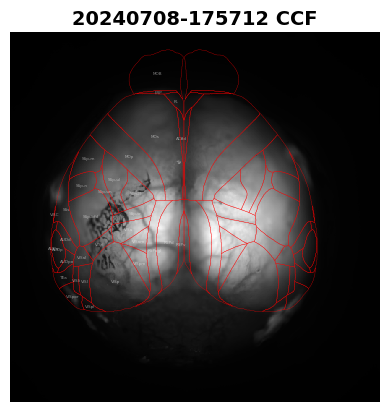

In [5]:
# plot avg_frame & CCF

fig = plt.figure()
plt.imshow(frames_average[0], cmap='gray')
for i, r in ccf_regions_im.iterrows():
    plt.plot(r['left_x'], r['left_y'], 'r', lw=0.2)
    plt.plot(r['right_x'], r['right_y'], 'r', lw=0.2)
    plt.text(r.left_center[0], r.left_center[1], r.acronym, color='w', va='center', fontsize=3, alpha=0.5, ha='center')

plt.axis('off')
plt.title(experiment+' CCF')
fig.set_facecolor('white')
plt.show()


In [6]:
def LCC_ICA(X, min_IC=2, max_IC=None, nIC_step=1, verbose=False):
    N = X.shape[0]
    if max_IC == None: max_IC=N
    for n_IC in range(min_IC, max_IC, nIC_step):
        print(f'\ntest n_IC = {n_IC}')
        demix_matrix=jadeR_cupy(X, m=n_IC, verbose=verbose)
        IC = demix_matrix @ X
#
        corr_matrix = np.corrcoef(IC)
        np.fill_diagonal(corr_matrix, 0)
        if np.max(np.abs(corr_matrix)) > 0.1:
            k = n_IC - 1
            print(f'\n\nk = {k}')
            selected_demix_matrix=jadeR_cupy(X, m=k, verbose=False)
            selected_IC = selected_demix_matrix @ X
            print(f'finish LCC_algorithm')
            return k, selected_IC, selected_demix_matrix
        

In [6]:
# 
def calculate_DW(e):
    numerator = np.sum((e[1:] - e[:-1]) ** 2)
    denominator = np.sum(e ** 2)
    DW = numerator / denominator
    return DW

def DW_ICA(X, min_IC=2, max_IC=None, nIC_step=1, verbose=False):
    N = X.shape[0]
    if max_IC == None: max_IC=N
    
    DW_values = []
    for n_IC in range(min_IC, max_IC, nIC_step):
        print(f'\ntest n_IC = {n_IC}')
        demix_matrix = jadeR_cupy(X, m=n_IC, verbose=verbose)
        IC = demix_matrix @ X
        Xk = cp.linalg.pinv(demix_matrix) @ IC
        Rk = cp.asnumpy(X - Xk)
        DW_sample_values = [calculate_DW(np.asarray(Rk[i, :]).ravel()) for i in range(N)]
        DW_values.append(DW_sample_values)
        print(f"DW: {DW_sample_values}")

        del demix_matrix, IC, Xk
        cp._default_memory_pool.free_all_blocks()

    IC_num = range(min_IC, max_IC, nIC_step)
    return IC_num, np.asarray(DW_values)


In [8]:
X = tif_sort.reshape(tif_height*tif_width, -1).T
print('ICA dim:', X.shape)

ICA dim: (14000, 262144)


In [9]:
k, IC, demix_matrix = LCC_ICA(X, min_IC=10, verbose=False)

IC_array = cp.asnumpy(IC.reshape(n_IC, *U.shape[:-1]))
mix_matrix = cp.asnumpy(cp.linalg.pinv(demix_matrix))

del X, demix_matrix, IC
cp._default_memory_pool.free_all_blocks()



test n_IC = 10


test n_IC = 11


test n_IC = 12


test n_IC = 13


test n_IC = 14


test n_IC = 15


test n_IC = 16


test n_IC = 17


test n_IC = 18


test n_IC = 19


test n_IC = 20


test n_IC = 21


test n_IC = 22


test n_IC = 23


test n_IC = 24


test n_IC = 25


test n_IC = 26


test n_IC = 27


test n_IC = 28


test n_IC = 29


test n_IC = 30


test n_IC = 31


test n_IC = 32


test n_IC = 33


test n_IC = 34


test n_IC = 35


test n_IC = 36


test n_IC = 37


test n_IC = 38


test n_IC = 39


test n_IC = 40


test n_IC = 41


test n_IC = 42


test n_IC = 43


test n_IC = 44


test n_IC = 45


test n_IC = 46


test n_IC = 47


test n_IC = 48


test n_IC = 49


test n_IC = 50


test n_IC = 51


test n_IC = 52


test n_IC = 53


test n_IC = 54


test n_IC = 55


test n_IC = 56


test n_IC = 57


test n_IC = 58


test n_IC = 59


test n_IC = 60


test n_IC = 61


test n_IC = 62


test n_IC = 63


test n_IC = 64


test n_IC = 65


test n_IC = 66


test n_IC = 67


test n_IC = 

KeyboardInterrupt: 

In [47]:
# IC_num, DW_values= DW_ICA(X, min_IC=5, max_IC=100, nIC_step=10, verbose=False)

DW_values_=np.hstack((np.asarray(IC_num).reshape(-1,1), DW_values))
np.savetxt(pjoin(path_out, 'DW_values.csv'), DW_values_, delimiter=",")

In [8]:
DW_values_ = np.loadtxt(pjoin(path_out, 'DW_values.csv'), delimiter=",")
IC_num = DW_values_[:,0]
DW_values = DW_values_[:,1:]

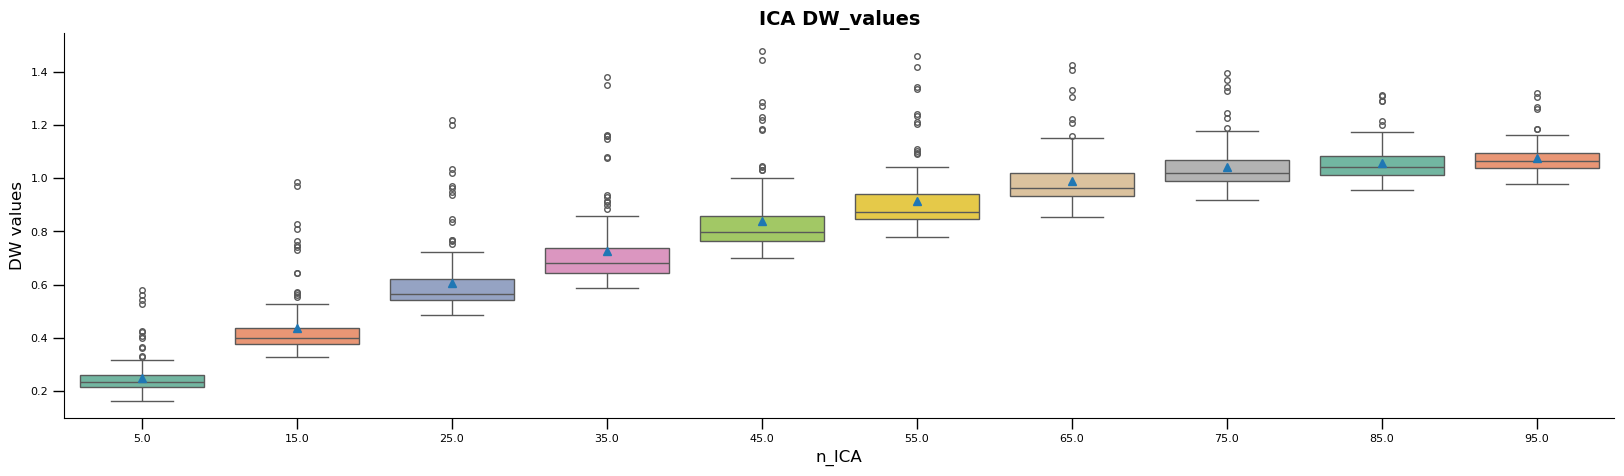

In [11]:
import seaborn as sns
import pandas as pd

n_model,n_sample = DW_values.shape
DW_values_bin = DW_values.reshape(n_model, 100, n_sample//100).mean(axis=1)
df = pd.DataFrame(DW_values_bin.T)

fig = plt.figure(figsize=(20,5))
sns.boxplot(data=df, palette="Set2", showmeans=True)
# sns.stripplot(data=df, color="black", jitter=0.2, size=3)

plt.title('ICA DW_values')
plt.xlabel('n_ICA')
plt.ylabel('DW values')
plt.xticks(ticks=np.arange(len(IC_num)), labels=IC_num) 

fig.set_facecolor('white') 
plt.savefig(pjoin(path_out, 'ICA DW_values'), bbox_inches='tight')
plt.show()


In [170]:
# set IC threshold, adjust ± sign

def zscore(matrix, axis=(1,2)):
    mean = np.mean(matrix, axis=axis)
    std = np.std(matrix, axis=axis)
    zscore_matrix = (matrix - mean[:,None,None]) / std[:,None,None]
    return zscore_matrix


IC_arrayz = zscore(IC_array)
IC_arrayz_cut = np.copy(IC_arrayz)

z_cut = 3
IC_arrayz_cut[np.abs(IC_arrayz_cut) < z_cut] = 0
IC_arrayz_cut[np.abs(IC_arrayz_cut) >= z_cut] = 1
# ic_sign = np.where(np.mean(IC_arrayz_cut, axis=(1,2)) < 0, -1, 1)
# IC_arrayz_cut = ic_sign[:, None, None] * IC_arrayz_cut  # 确保IC方向为正
# mix_matrix = ic_sign * mix_matrix

In [133]:
# ##%% load patch data

# path_retinotopy = r'/home/lzx/data/WF_VC_liuzhaoxi/24.03.27_C92/retinotopy/process/20240327-200819-retinotopy'

# with open(pjoin(path_retinotopy, 'retinotopy_out.pkl'), 'rb') as f:
#     retino = pickle.load(f)
# f.close()
# n_patch = len(retino['finalPatchesMarked'])

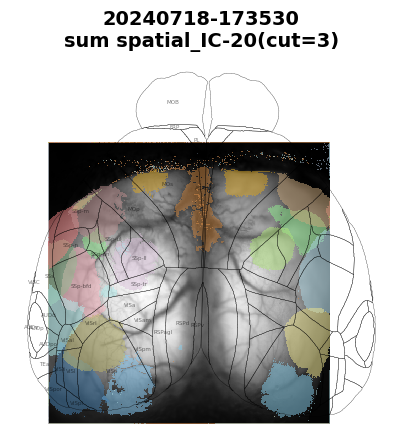

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

color_list = [
    "#B0C4DE", "#F4A460", "#87CEFA", "#FFB6C1", "#90EE90", "#4682B4", "#D8BFD8", 
    "#BDB76B", "#8FBC8F", "#F08080", "#BC8F8F", "#87CEEB", "#CDAA7D", "#B0E0E6", 
    "#CD853F", "#ADD8E6", "#B0E57C", "#F0E68C", "#DAA520", "#AFEEEE", "#DDA0DD", 
    "#A52A2A", "#8B4513", "#5F9EA0", "#F5DEB3", "#D2B48C", "#F4C2C2", "#E6E6FA", 
    "#EEE8AA", "#B4CDCD", "#FFE4B5", "#E0FFFF", "#DB7093", "#468499", "#FFD700", 
    "#40E0D0", "#FF6347", "#7FFFD4", "#FF7F50", "#9370DB", "#FF69B4", "#00CED1", 
    "#FFA07A", "#20B2AA", "#FF4500", "#FF8C00", "#6495ED", "#FF6347", "#4169E1", 
    "#DA70D6", "#98FB98", "#FF1493", "#32CD32", "#00FA9A", "#F08080", "#FFDAB9", 
    "#BA55D3", "#00FF7F", "#8A2BE2", "#4682B4", "#F5DEB3", "#00BFFF"
]


fig,ax = plt.subplots()
plt.imshow(frames_ave, cmap='gray')

# 逐个叠加IC，使用不同颜色
for i in range(n_IC):
    cmap = ListedColormap(['None', color_list[i]])
    plt.imshow(IC_arrayz_cut[i], cmap=cmap, interpolation='nearest', alpha=0.5)

for i, r in ccf_regions_im.iterrows():
    plt.plot(r['left_x'], r['left_y'], 'k', lw=0.2)
    plt.plot(r['right_x'], r['right_y'], 'k', lw=0.2)
    plt.text(r.left_center[0], r.left_center[1], r.acronym, color='k', va='center', fontsize=4, alpha=0.5, ha='center')

# plot_borders(retino['finalPatchesMarked'], plotAxis=ax, title=None, zoom=1,
#                  borderWidth=1, isColor=True, plotName=True, fontSize=7)

plt.axis('off')
# plt.colorbar()
fig.set_facecolor('white')
plt.title(experiment + f'\nsum spatial_IC-{n_IC}(cut={z_cut})')
plt.savefig(pjoin(path_out, experiment + f' sum spatial_IC-{n_IC}({ICA_methods})___colored.png'), bbox_inches='tight', pad_inches=0)
plt.savefig(pjoin('/home/lzx/data/WF_VC_liuzhaoxi/natural_movie_ICA_LZX', experiment + f' sum spatial_IC-{n_IC}({ICA_methods})___colored.png'), bbox_inches='tight', pad_inches=0)
plt.show()
